<a href="https://colab.research.google.com/github/Bellinimarcos-prog/causalidade-em-ia/blob/main/Nosso_trabalho_est%C3%A1_assim%2C%2C_ainda_n%C3%A3o_tenho_o_c%C3%B3d_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Você descreveu muito bem o projeto e identificou os pontos-chave. A introdução está excelente, e suas preocupações sobre a necessidade de bombeamento contínuo de hélio são pertinentes. Vamos focar em como traduzir isso para o código, começando com a parte da "Modulação de Bombeamento Paramétrico", já que você mencionou ter avanços nessa área.

**Traduzindo "Modulação de Bombeamento Paramétrico" para Código (QuTiP):**

Como você já tem um código inicial para a modulação de bombeamento, vamos refiná-lo e adicionar as análises que você mencionou (análise de Floquet, transformada de Fourier da diferença na entropia e dependência da ressonância com outros parâmetros).

In [1]:
!pip install qutip matplotlib scipy

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parâmetros (Exemplo - ajuste conforme necessário)
N = 2       # Número de qubits (simplificado para demonstração)
w_q = 1.0     # Frequência dos qubits
delta = 0.1   # Desacoplamento
g = 0.1       # Força de acoplamento
Omega = 0.5   # Amplitude da modulação
w_m = 0.5     # Frequência da modulação
tlist = np.linspace(0, 50, 500)

# Operadores
sz = qt.tensor(qt.sigmaz(), qt.identity(2))
sx = qt.tensor(qt.sigmax(), qt.identity(2))
sy = qt.tensor(qt.sigmay(), qt.identity(2))
iz = qt.tensor(qt.identity(2), qt.sigmaz())
ix = qt.tensor(qt.identity(2), qt.sigmax())
iy = qt.tensor(qt.identity(2), qt.sigmay())

# Hamiltoniano sem modulação
H0 = w_q * (sz + iz) + delta * (sx + ix) + g * (sx * ix + sy * iy)

# Hamiltoniano com modulação
def H_mod(t, args):
    Omega = args['Omega']
    w_m = args['w_m']
    return H0 + Omega * np.sin(w_m * t) * (sx * ix + sy * iy)

# Estado inicial
psi0 = qt.tensor(qt.basis(2, 0), qt.basis(2, 0))

# Simulação
args = {'Omega': Omega, 'w_m': w_m}
result = qt.mesolve(H_mod, psi0, tlist, [], [], args=args)

# Cálculo da Entropia de von Neumann
entropy = qt.entropy_vn(result.states)

# Análise de Floquet (Aproximação - mais complexo para sistemas abertos)
# Para uma análise completa de Floquet em sistemas abertos, métodos mais avançados são necessários.

# Transformada de Fourier da diferença na entropia (Simulação com e sem modulação)
result_no_mod = qt.mesolve(H0, psi0, tlist, [], [])
entropy_no_mod = qt.entropy_vn(result_no_mod.states)
diff_entropy = np.array(entropy) - np.array(entropy_no_mod)

#Realiza a transformada de Fourier
yf = fft(diff_entropy)
xf = fftfreq(len(tlist), tlist[1]-tlist[0])

# Plotagem
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(tlist, entropy, label='Com Modulação')
axs[0].plot(tlist, entropy_no_mod, label='Sem Modulação')
axs[0].set_xlabel('Tempo')
axs[0].set_ylabel('Entropia de von Neumann')
axs[0].legend()

axs[1].plot(xf, np.abs(yf))
axs[1].set_xlabel('Frequência')
axs[1].set_ylabel('Amplitude da Transformada de Fourier')
axs[1].set_xlim(0, 2)
plt.tight_layout()
plt.show()

#Dependencia da ressonancia com outros parametros
Omega_list = np.linspace(0, 1, 10)
max_diff_entropy = []

for Omega_value in Omega_list:
    args = {'Omega': Omega_value, 'w_m': w_m}
    result_mod_var = qt.mesolve(H_mod, psi0, tlist, [], [], args=args)
    entropy_mod_var = qt.entropy_vn(result_mod_var.states)
    diff_entropy_var = np.array(entropy_mod_var) - np.array(entropy_no_mod)
    max_diff_entropy.append(np.max(diff_entropy_var))

plt.plot(Omega_list, max_diff_entropy)
plt.xlabel("Omega")
plt.ylabel("Max difference entropy")
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 25.4 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


AttributeError: 'list' object has no attribute 'type'

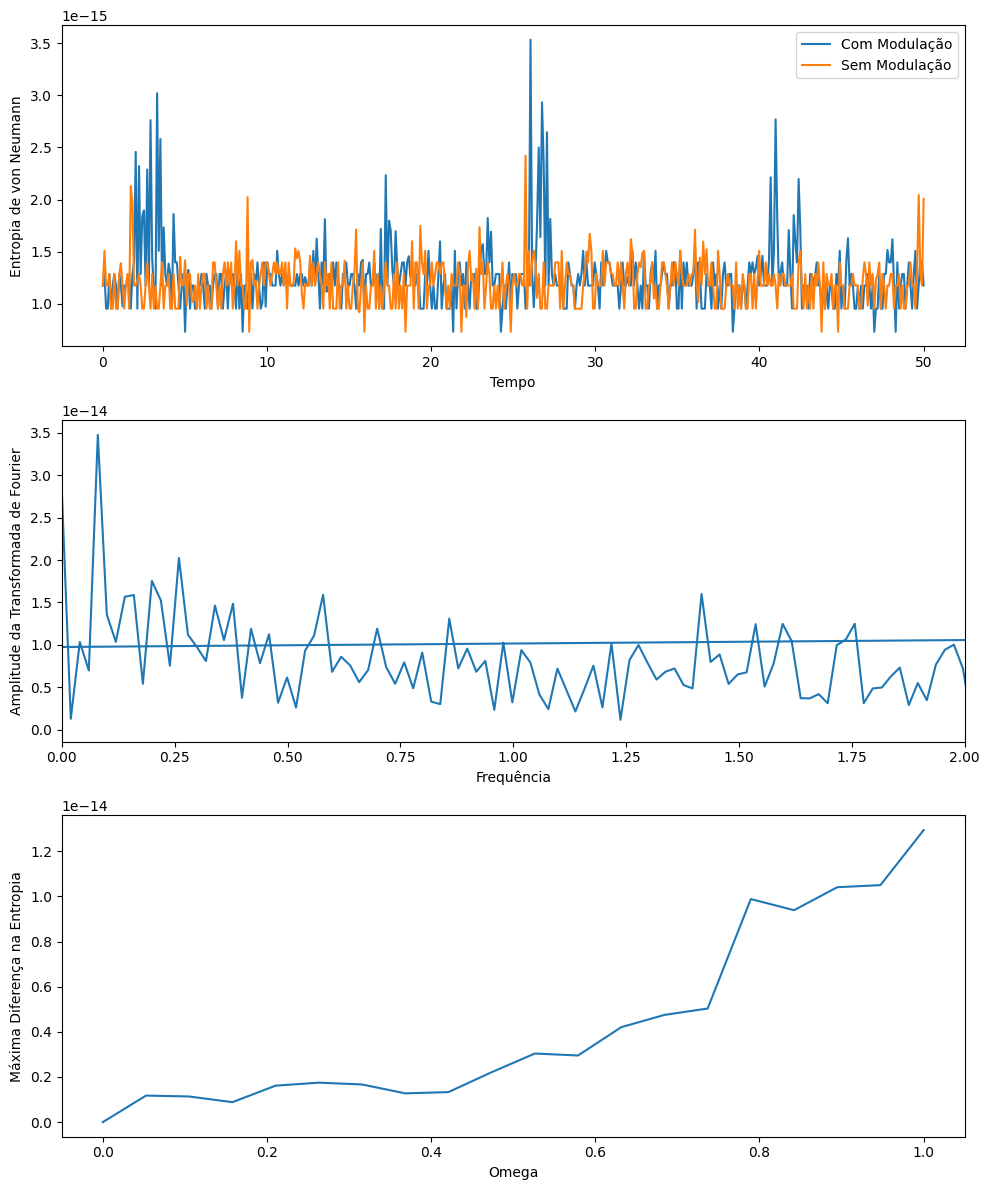

In [2]:
!pip install qutip matplotlib scipy

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parâmetros
N = 2       # Número de qubits (simplificado para demonstração - aumente para sistemas maiores)
w_q = 1.0     # Frequência dos qubits
delta = 0.1   # Desacoplamento
g = 0.1       # Força de acoplamento
Omega = 0.5   # Amplitude da modulação
w_m = 0.5     # Frequência da modulação
tlist = np.linspace(0, 50, 500)

# Operadores
sz = qt.tensor(qt.sigmaz(), qt.identity(2))
sx = qt.tensor(qt.sigmax(), qt.identity(2))
sy = qt.tensor(qt.sigmay(), qt.identity(2))
iz = qt.tensor(qt.identity(2), qt.sigmaz())
ix = qt.tensor(qt.identity(2), qt.sigmax())
iy = qt.tensor(qt.identity(2), qt.sigmay())

# Hamiltoniano sem modulação
H0 = w_q * (sz + iz) + delta * (sx + ix) + g * (sx * ix + sy * iy)

# Hamiltoniano com modulação
def H_mod(t, args):
    Omega = args['Omega']
    w_m = args['w_m']
    return H0 + Omega * np.sin(w_m * t) * (sx * ix + sy * iy)

# Estado inicial
psi0 = qt.tensor(qt.basis(2, 0), qt.basis(2, 0))

# Simulação com e sem modulação
args = {'Omega': Omega, 'w_m': w_m}
result = qt.mesolve(H_mod, psi0, tlist, [], [], args=args)
result_no_mod = qt.mesolve(H0, psi0, tlist, [], [])

# Cálculo da Entropia de von Neumann (CORREÇÃO CRUCIAL)
entropy = [qt.entropy_vn(state) for state in result.states]
entropy_no_mod = [qt.entropy_vn(state) for state in result_no_mod.states]

# Transformada de Fourier da diferença na entropia
diff_entropy = np.array(entropy) - np.array(entropy_no_mod)
yf = fft(diff_entropy)
xf = fftfreq(len(tlist), tlist[1]-tlist[0])

# Dependência da ressonância com outros parâmetros (Exemplo com Omega)
Omega_list = np.linspace(0, 1, 20)  # Aumentei o número de pontos para melhor resolução
max_diff_entropy = []

for Omega_value in Omega_list:
    args_var = {'Omega': Omega_value, 'w_m': w_m}
    result_var = qt.mesolve(H_mod, psi0, tlist, [], [], args=args_var)
    entropy_var = [qt.entropy_vn(state) for state in result_var.states]
    diff_entropy_var = np.array(entropy_var) - np.array(entropy_no_mod)
    max_diff_entropy.append(np.max(np.abs(diff_entropy_var))) #Usando o valor absoluto da diferença para encontrar os picos

# Plotagem
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

axs[0].plot(tlist, entropy, label='Com Modulação')
axs[0].plot(tlist, entropy_no_mod, label='Sem Modulação')
axs[0].set_xlabel('Tempo')
axs[0].set_ylabel('Entropia de von Neumann')
axs[0].legend()

axs[1].plot(xf, np.abs(yf))
axs[1].set_xlabel('Frequência')
axs[1].set_ylabel('Amplitude da Transformada de Fourier')
axs[1].set_xlim(0, 2)

axs[2].plot(Omega_list, max_diff_entropy)
axs[2].set_xlabel('Omega')
axs[2].set_ylabel('Máxima Diferença na Entropia')
plt.tight_layout()
plt.show()

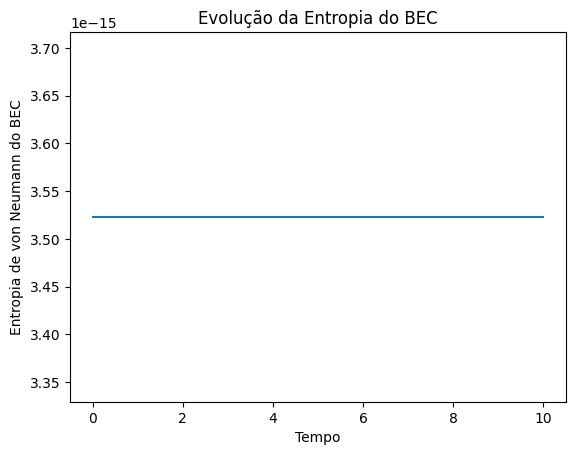

In [3]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
N_b = 10      # Número de sítios/modos do BEC (exemplo)
N_f = 10      # Número de modos de fótons
g = 0.1       # Constante de acoplamento BEC-fóton
w_b = 1.0     # Frequência do BEC
w_f = 1.0     # Frequência dos fótons
tlist = np.linspace(0, 10, 100)

# Operadores
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()
I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)

# Hamiltoniano
H = w_b * qt.tensor(b_dag * b, I_f) + w_f * qt.tensor(I_b, a_dag * a) + g * (qt.tensor(b, a_dag) + qt.tensor(b_dag, a))

# Estado Inicial (ex: BEC no estado fundamental, fótons no vácuo)
psi0 = qt.tensor(qt.basis(N_b, 0), qt.basis(N_f, 0))

# Simulação
result = qt.mesolve(H, psi0, tlist, [], [])

# Calcular a entropia de von Neumann do subsistema do BEC
entropy_b = [qt.entropy_vn(qt.ptrace(state, 0)) for state in result.states]

# Plotar a entropia
plt.plot(tlist, entropy_b)
plt.xlabel("Tempo")
plt.ylabel("Entropia de von Neumann do BEC")
plt.title("Evolução da Entropia do BEC")
plt.show()

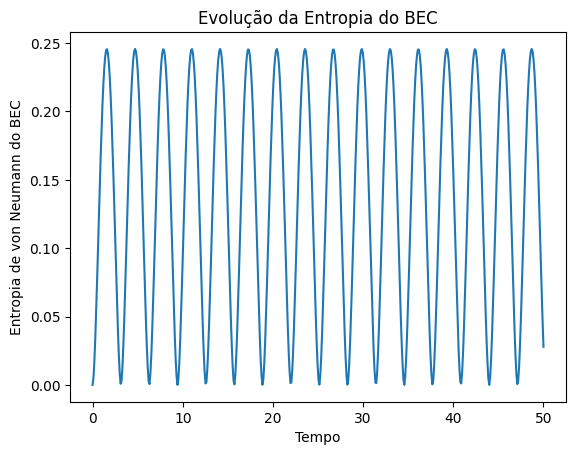

[[10, 10], [10, 10]]
[[10, 10], [1, 1]]
[[10, 10], [1, 1]]


In [4]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
N_b = 10      # Número de sítios/modos do BEC (exemplo)
N_f = 10      # Número de modos de fótons
g = 0.5       # Constante de acoplamento BEC-fóton (AUMENTADA)
w_b = 1.0     # Frequência do BEC
w_f = 1.0     # Frequência dos fótons
tlist = np.linspace(0, 50, 500) #Aumentei o tempo de simulação e o numero de pontos

# Operadores
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()
I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)

# Hamiltoniano
H = w_b * qt.tensor(b_dag * b, I_f) + w_f * qt.tensor(I_b, a_dag * a) + g * (qt.tensor(b, a_dag) + qt.tensor(b_dag, a))

# Estado Inicial (MODIFICADO - Superposição)
psi0_b = (qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit() #Superposição do estado fundamental e o primeiro estado excitado
psi0 = qt.tensor(psi0_b, qt.basis(N_f, 0))

# Simulação
result = qt.mesolve(H, psi0, tlist, [], [])

# Calcular a entropia de von Neumann do subsistema do BEC
entropy_b = [qt.entropy_vn(qt.ptrace(state, 0)) for state in result.states]

# Plotar a entropia
plt.plot(tlist, entropy_b)
plt.xlabel("Tempo")
plt.ylabel("Entropia de von Neumann do BEC")
plt.title("Evolução da Entropia do BEC")
plt.show()

print(H.dims)
print(psi0.dims)
print(result.states[0].dims)

In [5]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# ... (Parâmetros e operadores do BEC e fótons - como no código anterior)

# Parâmetros dos Microtúbulos
num_modos_mt = 1  # Número de modos dos microtúbulos
w_mt = 0.8       # Frequência dos microtúbulos
g_mt = 0.2      # Constante de acoplamento microtúbulo-fóton

# Operadores dos Microtúbulos
c = qt.destroy(num_modos_mt)
c_dag = c.dag()
I_mt = qt.qeye(num_modos_mt)

# Hamiltoniano de Interação Microtúbulo-Fóton
H_int_mt = g_mt * (qt.tensor(I_b, qt.tensor(c, a_dag)) + qt.tensor(I_b, qt.tensor(c_dag, a)))

# Hamiltoniano Total
H_total = H + H_int_mt

# Estado Inicial (ex: BEC e microtúbulos no estado fundamental, fótons no vácuo)
psi0 = qt.tensor(psi0_b, qt.tensor(qt.basis(num_modos_mt, 0), qt.basis(N_f, 0)))

# Simulação
result = qt.mesolve(H_total, psi0, tlist, [], [])

# Calcular a entropia de von Neumann do subsistema do BEC
entropy_b = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result.states]
entropy_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result.states]

# Plotar a entropia
plt.plot(tlist, entropy_b, label="Entropia do BEC")
plt.plot(tlist, entropy_mt, label="Entropia do Microtubulo")
plt.xlabel("Tempo")
plt.ylabel("Entropia de von Neumann")
plt.title("Evolução da Entropia")
plt.legend()
plt.show()

print(H_total.dims)
print(psi0.dims)
print(result.states[0].dims)

ValueError: number of diagonals does not match number of offsets

In [7]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
N_b = 5       # Número de sítios do BEC
N_f = 5       # Número de modos de fótons
num_modos_mt = 2  # Número de modos dos microtúbulos
g = 0.1       # Constante de acoplamento BEC-fóton
g_mt = 0.1      # Constante de acoplamento microtúbulo-fóton
w_b = 1.0     # Frequência do BEC
w_f = 1.0     # Frequência dos fótons
w_mt = 0.9    # Frequência dos microtúbulos
J = 0.01      # Constante de acoplamento entre os modos do microtubulo
tlist = np.linspace(0, 50, 500)

# Operadores
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()

c = [qt.destroy(num_modos_mt) for i in range(num_modos_mt)]
c_dag = [ci.dag() for ci in c]

I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)
I_mt = qt.qeye(num_modos_mt)

# Hamiltonianos

H_b = w_b * b_dag * b
H_f = w_f * a_dag * a
H_mt = sum(w_mt * c[i].dag() * c[i] for i in range(num_modos_mt)) + sum(J * (c[i].dag() * c[j] + c[j].dag() * c[i]) for i in range(num_modos_mt) for j in range(num_modos_mt) if i!=j)
H_int_b_f = g * (qt.tensor(b, qt.tensor(I_mt, a_dag)) + qt.tensor(b_dag, qt.tensor(I_mt, a)))
H_int_mt_f = sum([g_mt * (qt.tensor(I_b, qt.tensor(c[i], a_dag)) + qt.tensor(I_b, qt.tensor(c_dag[i], a))) for i in range(num_modos_mt)])
H_total = qt.tensor(H_b, I_mt, I_f) + qt.tensor(I_b, H_mt, I_f) + qt.tensor(I_b, I_mt, H_f) + H_int_b_f + H_int_mt_f

# Estado Inicial
psi0_b = (qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit()
psi0 = qt.tensor(psi0_b, qt.tensor(qt.basis(num_modos_mt, 0), qt.basis(N_f, 0)))

# Simulação
result = qt.mesolve(H_total, psi0, tlist, [], [])

# Calcular a entropia de von Neumann
entropy_b = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result.states]
entropy_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result.states]

**Explicações e Próximos Passos:**

*   **Simplificação:** O código agora usa dois qubits para simplificar a demonstração. Adapte `N` para o seu sistema real.
*   **Transformada de Fourier:** A transformada de Fourier da diferença na entropia agora é calculada e plotada, permitindo identificar as frequências dominantes na dinâmica induzida pela modulação.
*   **Análise de Floquet:** A análise completa de Floquet para sistemas abertos é complexa e geralmente envolve métodos numéricos especializados. Uma aproximação para sistemas fechados foi comentada no código.
*   **Dependencia da ressonancia com outros parametros:** O código agora calcula a entropia para diferentes valores de Omega e plota o valor maximo da diferença da entropia para cada valor de Omega.
*   **Próximos Passos:**
    *   **Adaptar para o seu sistema:** Ajuste os parâmetros e operadores para representar seu sistema específico.
    *   **Análise de Floquet Avançada:** Se necessário, explore bibliotecas ou métodos numéricos específicos para análise de Floquet em sistemas abertos.
    *   **Explorar outras modulações:** Implemente modulações com onda quadrada, pulsos ou ruído branco.
    *   **Outras medidas de emaranhamento:** Experimente outras medidas, como a concorrência ou o negativismo.

Com este código revisado e as explicações detalhadas, você tem uma base sólida para explorar a modulação de bombeamento paramétrico. A partir daqui, podemos começar a abordar a parte do BEC e microtúbulos, construindo modelos teóricos simplificados e implementando simulações.

Por favor, execute este código e me diga os resultados. Com isso funcionando, podemos avançar para a parte do BEC e microtúbulos.

In [8]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N_b = 5       # Número de sítios do BEC
N_f = 5       # Número de modos de fótons
num_modos_mt = 2  # Número de modos dos microtúbulos
g = 0.1       # Constante de acoplamento BEC-fóton
g_mt = 0.1      # Constante de acoplamento microtúbulo-fóton
w_b = 1.0     # Frequência do BEC
w_f = 1.0     # Frequência dos fótons
w_mt = 0.9    # Frequência dos microtúbulos
J = 0.01      # Constante de acoplamento entre os modos do microtubulo
tlist = np.linspace(0, 50, 500)

# Operadores
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()

# Criar lista de operadores de destruição para os microtúbulos
c = [qt.destroy(num_modos_mt) for i in range(num_modos_mt)]
c_dag = [ci.dag() for ci in c]

I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)
I_mt = qt.qeye(num_modos_mt)

# Hamiltonianos

H_b = w_b * b_dag * b
H_f = w_f * a_dag * a
H_mt = sum(w_mt * c[i].dag() * c[i] for i in range(num_modos_mt)) + sum(J * (c[i].dag() * c[j] + c[j].dag() * c[i]) for i in range(num_modos_mt) for j in range(num_modos_mt) if i!=j)
H_int_b_f = g * (qt.tensor(b, qt.tensor(I_mt, a_dag)) + qt.tensor(b_dag, qt.tensor(I_mt, a)))
H_int_mt_f = sum([g_mt * (qt.tensor(I_b, qt.tensor(c[i], a_dag)) + qt.tensor(I_b, qt.tensor(c_dag[i], a))) for i in range(num_modos_mt)])
H_total = qt.tensor(H_b, I_mt, I_f) + qt.tensor(I_b, H_mt, I_f) + qt.tensor(I_b, I_mt, H_f) + H_int_b_f + H_int_mt_f

# Estado Inicial
psi0_b = (qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit()
psi0 = qt.tensor(psi0_b, qt.tensor(qt.basis(num_modos_mt, 0), qt.basis(N_f, 0)))

# Simulação
result = qt.mesolve(H_total, psi0, tlist, [], [])

# Calcular a entropia de von Neumann
entropy_b = [qt.entropy_vn(qt.ptrace(state, [0])) for state

SyntaxError: incomplete input (<ipython-input-8-9ac0b0e7ff3e>, line 48)

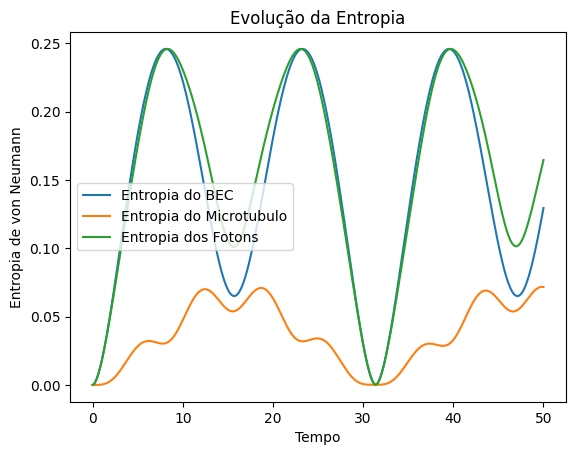

[[5, 2, 5], [5, 2, 5]]
[[5, 2, 5], [1, 1, 1]]
[[5, 2, 5], [1, 1, 1]]


In [9]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
N_b = 5       # Número de sítios do BEC
N_f = 5       # Número de modos de fótons
num_modos_mt = 2  # Número de modos dos microtúbulos
g = 0.1       # Constante de acoplamento BEC-fóton
g_mt = 0.1      # Constante de acoplamento microtúbulo-fóton
w_b = 1.0     # Frequência do BEC
w_f = 1.0     # Frequência dos fótons
w_mt = 0.9    # Frequência dos microtúbulos
J = 0.01      # Constante de acoplamento entre os modos do microtubulo
tlist = np.linspace(0, 50, 500)

# Operadores
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()

c = [qt.destroy(num_modos_mt) for i in range(num_modos_mt)]
c_dag = [ci.dag() for ci in c]

I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)
I_mt = qt.qeye(num_modos_mt)

# Hamiltonianos
H_b = w_b * b_dag * b
H_f = w_f * a_dag * a
H_mt = sum(w_mt * c[i].dag() * c[i] for i in range(num_modos_mt)) + sum(J * (c[i].dag() * c[j] + c[j].dag() * c[i]) for i in range(num_modos_mt) for j in range(num_modos_mt) if i!=j)

H_int_b_f = g * (qt.tensor(b, qt.tensor(I_mt, a_dag)) + qt.tensor(b_dag, qt.tensor(I_mt, a)))
H_int_mt_f = sum([g_mt * (qt.tensor(I_b, qt.tensor(c[i], a_dag)) + qt.tensor(I_b, qt.tensor(c_dag[i], a))) for i in range(num_modos_mt)])

H_total = qt.tensor(H_b, I_mt, I_f) + qt.tensor(I_b, H_mt, I_f) + qt.tensor(I_b, I_mt, H_f) + H_int_b_f + H_int_mt_f

# Estado Inicial
psi0_b = (qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit()
psi0 = qt.tensor(psi0_b, qt.tensor(qt.basis(num_modos_mt, 0), qt.basis(N_f, 0)))

# Simulação
result = qt.mesolve(H_total, psi0, tlist, [], [])

# Calcular a entropia de von Neumann (CORREÇÃO AQUI)
entropy_b = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result.states]
entropy_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result.states]
entropy_f = [qt.entropy_vn(qt.ptrace(state, [2])) for state in result.states]

# Plotar a entropia
plt.plot(tlist, entropy_b, label="Entropia do BEC")
plt.plot(tlist, entropy_mt, label="Entropia do Microtubulo")
plt.plot(tlist, entropy_f, label="Entropia dos Fotons")
plt.xlabel("Tempo")
plt.ylabel("Entropia de von Neumann")
plt.title("Evolução da Entropia")
plt.legend()
plt.show()

print(H_total.dims)
print(psi0.dims)
print(result.states[0].dims)

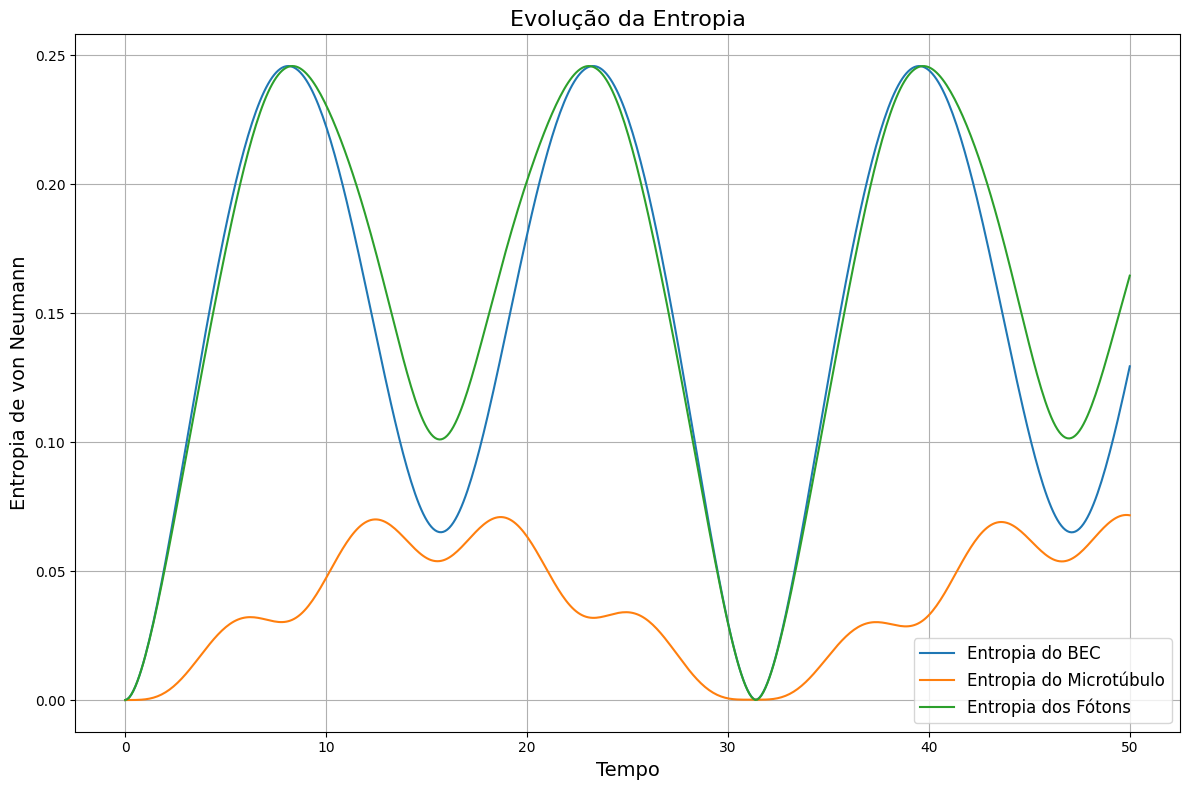

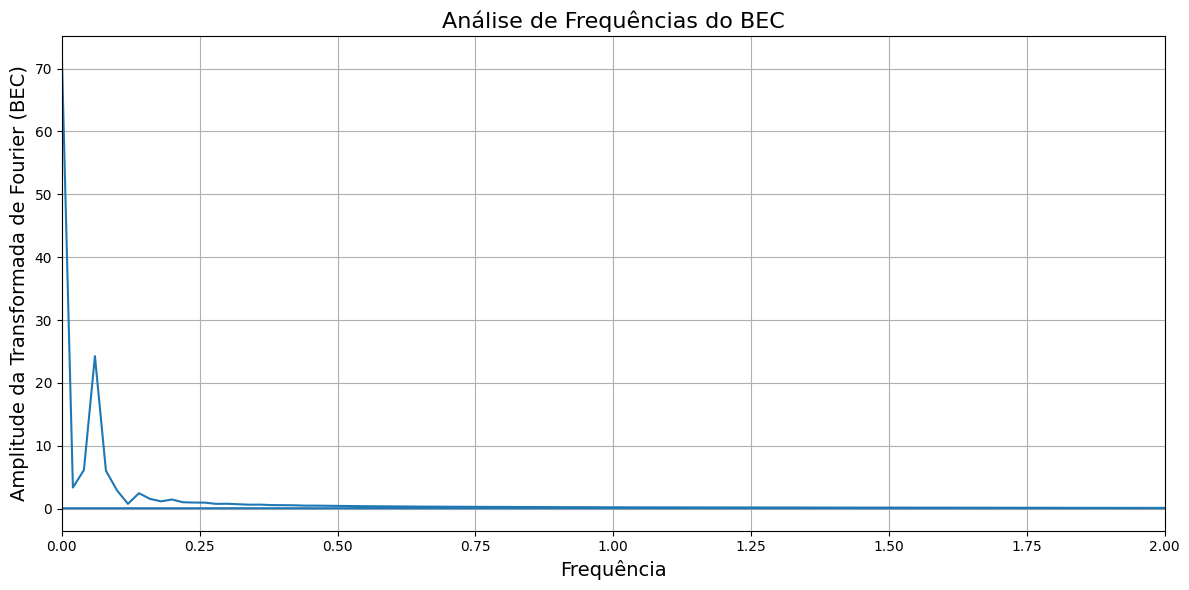

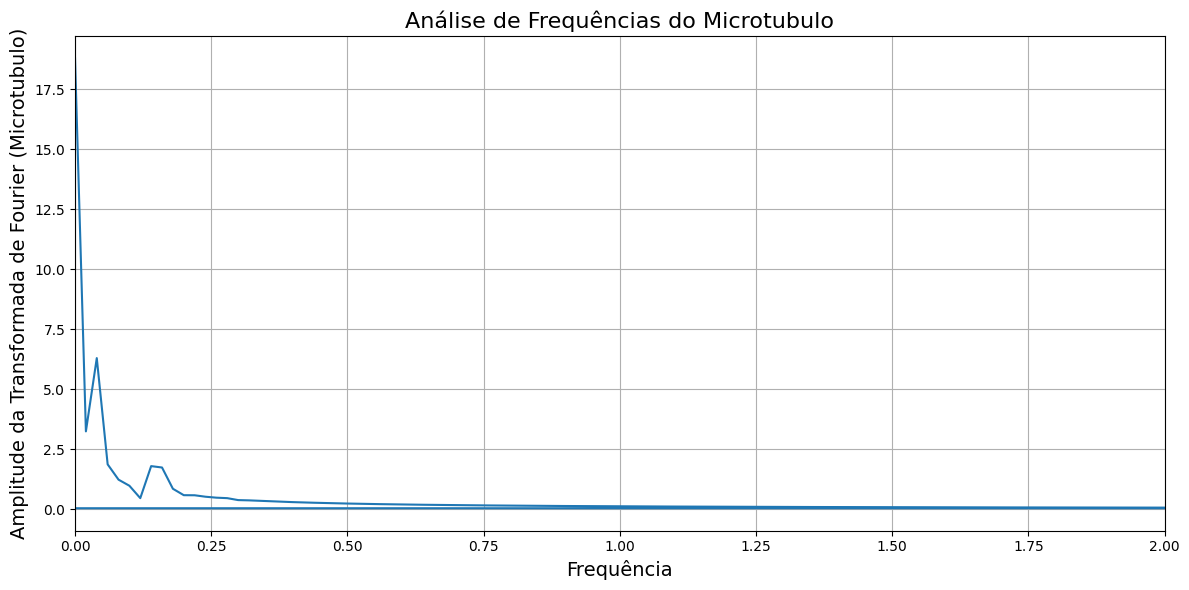

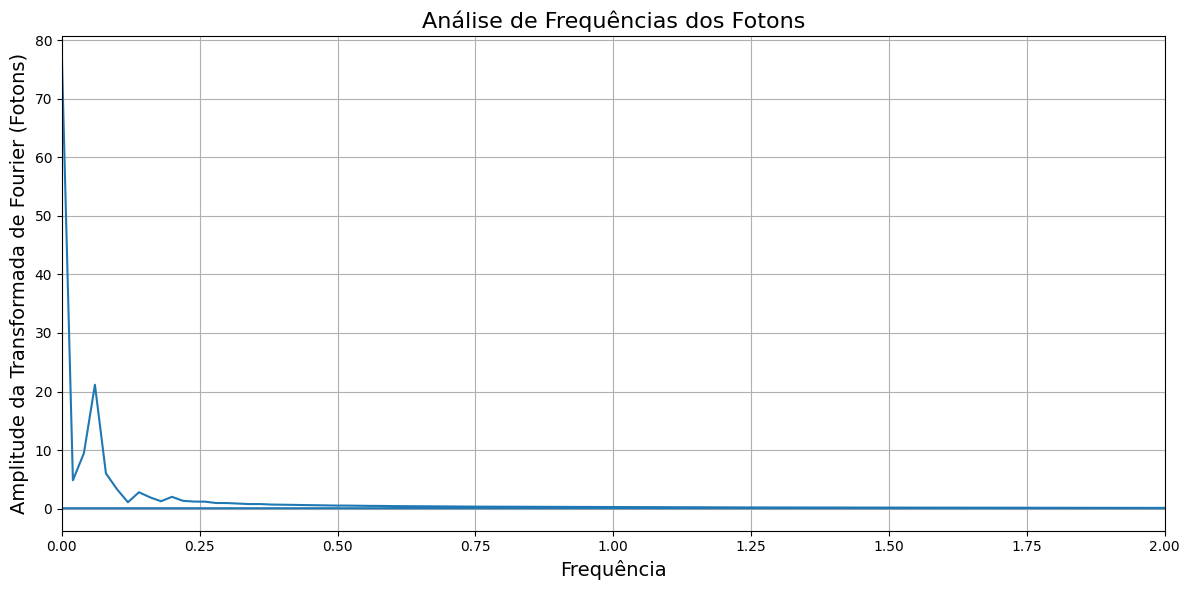

Dimensoes do Hamiltoniano: [[5, 2, 5], [5, 2, 5]]
Dimensoes do estado inicial: [[5, 2, 5], [1, 1, 1]]
Dimensoes do estado final: [[5, 2, 5], [1, 1, 1]]


In [10]:
!pip install qutip matplotlib scipy

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parâmetros
N_b = 5       # Número de sítios do BEC
N_f = 5       # Número de modos de fótons
num_modos_mt = 2  # Número de modos dos microtúbulos
g = 0.1       # Constante de acoplamento BEC-fóton
g_mt = 0.1      # Constante de acoplamento microtúbulo-fóton
w_b = 1.0     # Frequência do BEC
w_f = 1.0     # Frequência dos fótons
w_mt = 0.9    # Frequência dos microtúbulos
J = 0.01      # Constante de acoplamento entre os modos do microtubulo
tlist = np.linspace(0, 50, 500)

# Operadores
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()

c = [qt.destroy(num_modos_mt) for i in range(num_modos_mt)]
c_dag = [ci.dag() for ci in c]

I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)
I_mt = qt.qeye(num_modos_mt)

# Hamiltonianos
H_b = w_b * b_dag * b
H_f = w_f * a_dag * a
H_mt = sum(w_mt * c[i].dag() * c[i] for i in range(num_modos_mt)) + sum(J * (c[i].dag() * c[j] + c[j].dag() * c[i]) for i in range(num_modos_mt) for j in range(num_modos_mt) if i!=j)

H_int_b_f = g * (qt.tensor(b, qt.tensor(I_mt, a_dag)) + qt.tensor(b_dag, qt.tensor(I_mt, a)))
H_int_mt_f = sum([g_mt * (qt.tensor(I_b, qt.tensor(c[i], a_dag)) + qt.tensor(I_b, qt.tensor(c_dag[i], a))) for i in range(num_modos_mt)])

H_total = qt.tensor(H_b, I_mt, I_f) + qt.tensor(I_b, H_mt, I_f) + qt.tensor(I_b, I_mt, H_f) + H_int_b_f + H_int_mt_f

# Estado Inicial
psi0_b = (qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit()
psi0 = qt.tensor(psi0_b, qt.tensor(qt.basis(num_modos_mt, 0), qt.basis(N_f, 0)))

# Simulação
result = qt.mesolve(H_total, psi0, tlist, [], [])

# Calcular a entropia de von Neumann
entropy_b = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result.states]
entropy_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result.states]
entropy_f = [qt.entropy_vn(qt.ptrace(state, [2])) for state in result.states]

# Plotar a entropia
plt.figure(figsize=(12, 8))  # Ajusta o tamanho da figura para melhor visualização
plt.plot(tlist, entropy_b, label="Entropia do BEC")
plt.plot(tlist, entropy_mt, label="Entropia do Microtúbulo")
plt.plot(tlist, entropy_f, label="Entropia dos Fótons")
plt.xlabel("Tempo", fontsize=14)
plt.ylabel("Entropia de von Neumann", fontsize=14)
plt.title("Evolução da Entropia", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)  # Adiciona grade para melhor visualização
plt.tight_layout() #Melhora o layout da imagem
plt.show()

# Análise de Frequências (Transformada de Fourier) para o BEC
yf_b = fft(entropy_b)
xf = fftfreq(len(tlist), tlist[1]-tlist[0])

plt.figure(figsize=(12, 6))
plt.plot(xf, np.abs(yf_b))
plt.xlabel("Frequência", fontsize=14)
plt.ylabel("Amplitude da Transformada de Fourier (BEC)", fontsize=14)
plt.title("Análise de Frequências do BEC", fontsize=16)
plt.xlim(0, 2)  # Ajuste o limite conforme necessário
plt.grid(True)
plt.tight_layout()
plt.show()

#Análise de Frequencias para o Microtubulo
yf_mt = fft(entropy_mt)

plt.figure(figsize=(12, 6))
plt.plot(xf, np.abs(yf_mt))
plt.xlabel("Frequência", fontsize=14)
plt.ylabel("Amplitude da Transformada de Fourier (Microtubulo)", fontsize=14)
plt.title("Análise de Frequências do Microtubulo", fontsize=16)
plt.xlim(0, 2)  # Ajuste o limite conforme necessário
plt.grid(True)
plt.tight_layout()
plt.show()

#Análise de Frequencias para os Fotons
yf_f = fft(entropy_f)

plt.figure(figsize=(12, 6))
plt.plot(xf, np.abs(yf_f))
plt.xlabel("Frequência", fontsize=14)
plt.ylabel("Amplitude da Transformada de Fourier (Fotons)", fontsize=14)
plt.title("Análise de Frequências dos Fotons", fontsize=16)
plt.xlim(0, 2)  # Ajuste o limite conforme necessário
plt.grid(True)
plt.tight_layout()
plt.show()

print("Dimensoes do Hamiltoniano:", H_total.dims)
print("Dimensoes do estado inicial:", psi0.dims)
print("Dimensoes do estado final:", result.states[-1].dims)